<a href="https://colab.research.google.com/github/jamshaidtahiri/linear_regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
X = df[["TV","radio","newspaper"]]
Y = df["sales"]
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [9]:
import random
def initialize(dim):
  b = random.random()
  theta = np.random.rand(dim)
  return b,theta
b,theta = initialize(3)
print("Bias",b,"Weights:", theta)

Bias 0.9338271265622272 Weights: [0.55854365 0.21307442 0.32480879]


In [11]:
def predict_Y(b,theta,X):
 return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]


array([ 2.2591606 ,  0.71379609,  0.99183153,  1.63846033,  1.38986489,
        1.06459794,  0.3829407 ,  0.42393124, -0.7113485 ,  0.84098606])

In [12]:

import math
def get_cost(Y,Y_hat):
 Y_resd=Y-Y_hat
 return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
 Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)



1.148453659879554

After initialization -Bias:  0.015414573175083084 theta:  [0.75651106 0.50243488 0.02896595]
After first update -Bias:  0.015106281711581421 theta:  [0.7564421  0.50287402 0.02853938]


Text(0, 0.5, 'Cost or MSE')

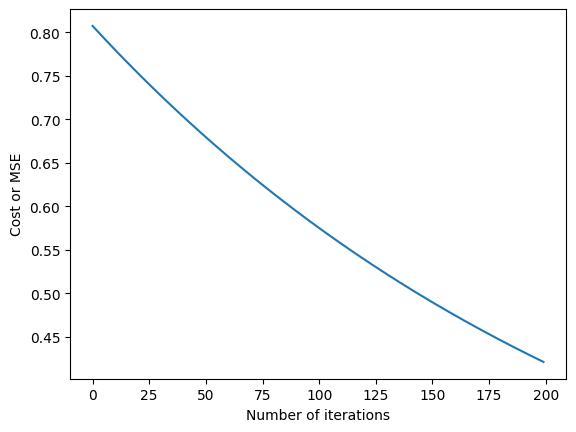

In [19]:

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
 db=(np.sum(y_hat-y)*2)/len(y)
 dw=(np.dot((y_hat-y),x)*2)/len(y)
 b_1=b_0-learning_rate*db
 theta_1=theta_o-learning_rate*dw
 return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

def run_gradient_descent(X,Y,alpha,num_iterations):
 b,theta=initialize(X.shape[1])
 iter_num=0
 gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
 result_idx=0
 for each_iter in range(num_iterations):
  Y_hat=predict_Y(b,theta,X)
  this_cost=get_cost(Y,Y_hat)
  prev_b=b
  prev_theta=theta
  b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
  #if(iter_num%10==0):
  gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
  result_idx=result_idx+1
  iter_num +=1
  #print("Final Estimate of b and theta : ",b,theta,iter_num)
 return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)



gd_iterations_df[0:10]


%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")






Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

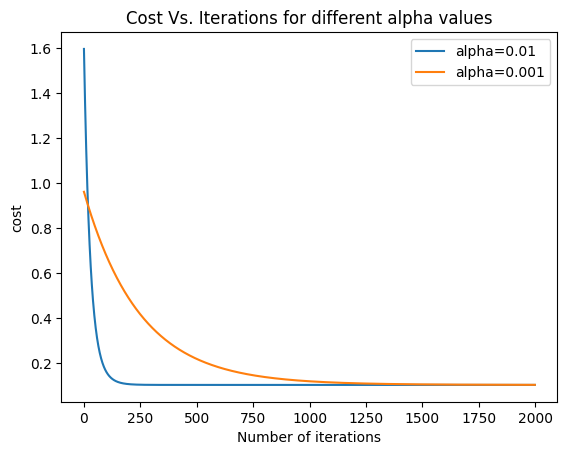

In [17]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')